<a href="https://colab.research.google.com/github/pabasara404/FOT-MT-ETM4272/blob/main/b5_tha2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Take Home Assignment 02: Liquid Level

1. Analyzing the liquid level of a vessel will be studied in this assignment
2. How to utilize background subtraction is demonstrated in the notebook
3. How to use subsequent thresholding and contour analysis is also demonstrated
4. The student's task is to implement the demonstrated techniques to obtain a liquid level plot for the entirety of the video

Notes:
It is advised to go over the opencv documentation for the following functions

cv2.threshold  :  https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html




Student has to deliver:
1. Plot of the liquid level.
2. A brief note on what the student understood by reading the section on Otsu's threholding method.
3. 2 examples of probable erroraneous liquid level readings, when using Otsu's method. Show with annoted images.
4. A brief description on the final algorithm developed by the student.


In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

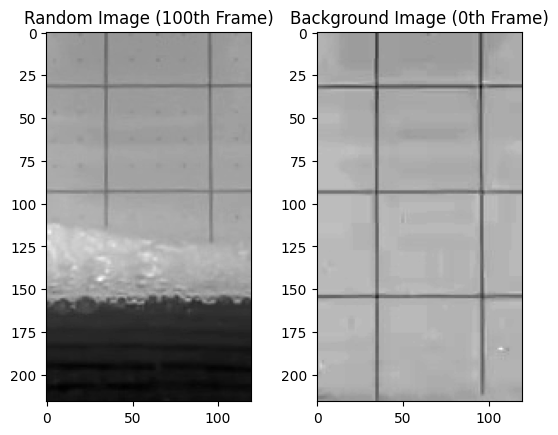

In [7]:
# Importing Demo Images
img_r = cv2.imread('demo2_images/liquid_frame100.jpg', 0)
img_b = cv2.imread('demo2_images/liquid_frame000.jpg', 0)

# Display the images
plt.subplot(121), plt.imshow(img_r, cmap='gray'), plt.title('Random Image (100th Frame)')
plt.subplot(122), plt.imshow(img_b, cmap='gray'), plt.title('Background Image (0th Frame)')
plt.show()

Method 1 : Background Subtraction

Threshold Value: 50.0
Contour 0 Area: 6826.0
Contour 1 Area: 0.0
Contour 2 Area: 0.0
Total Area: 25920
Percentage: 26.3 %


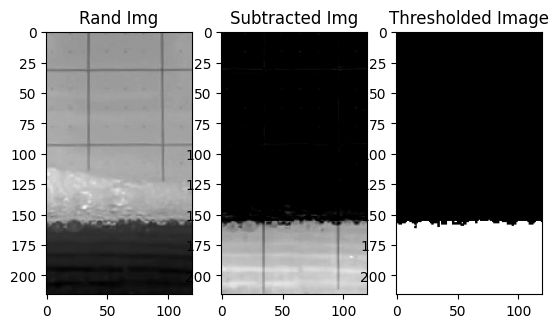

In [8]:
# Subtracting the images
img_sub = cv2.subtract(img_b, img_r)

# Thresholding the image, to obtain binary image
ret, img_sub_thresh = cv2.threshold(img_sub, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# Print the used threshold value
print('Threshold Value:', ret)

# Find contours in the image
contours, hierarchy = cv2.findContours(img_sub_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Sort the contours by size in descending order
contours = sorted(contours, key=lambda x: cv2.contourArea(x), reverse=True)
# Print the contour areas
for i in range(len(contours)):
    print('Contour', i, 'Area:', cv2.contourArea(contours[i]))

# Find the area of the whole image
rows, cols = img_sub_thresh.shape
total_area = rows * cols
print('Total Area:', total_area)

# Calculate the percentage of the largest contour area, rounded to 1 decimal point
percentage = round((cv2.contourArea(contours[0]) / total_area) * 100, 1)
print('Percentage:', percentage, '%')

# Display img_r , img_sub, img_sub_thresh side by side using plt
plt.subplot(131), plt.imshow(img_r, cmap='gray'), plt.title('Rand Img')
plt.subplot(132), plt.imshow(img_sub, cmap='gray'), plt.title('Subtracted Img')
plt.subplot(133), plt.imshow(img_sub_thresh, cmap='gray'), plt.title('Thresholded Image')
plt.show()

How to read video files

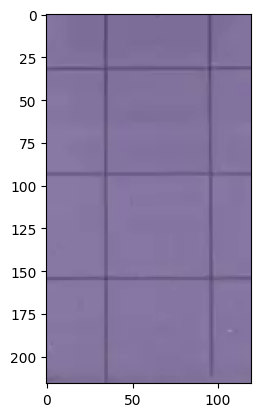

In [9]:
# Reading frames from a video
cap = cv2.VideoCapture('demo2_images/liquidVideo.mp4')
ret, frame1 = cap.read()

# Displaying the first frame using plt
plt.imshow(frame1)
plt.show()



# **Take Home Assignment Answers**

***1. Plot of the liquid level.***

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the video
video_path = 'demo2_images/liquidVideo.mp4'

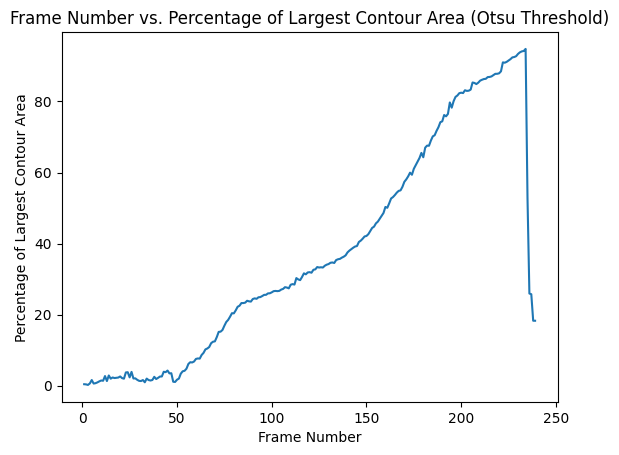

In [3]:
# Function to set window positions
def set_window_positions():
    cv2.moveWindow('Frame', 100, 100)  # Top-left window
    cv2.moveWindow('Diff', 250, 100)   # Bottom-left window
    cv2.moveWindow('Thresh', 400, 100) # Top-right window

cap = cv2.VideoCapture(video_path)

# Read the first frame
ret, first_frame = cap.read()
if not ret:
    print("Failed to read the video")
    cap.release()
    exit()

# Convert the first frame to grayscale
first_frame_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)

# Initialize variables to store frame numbers and percentages
frame_numbers = []
percentages = []

frame_no = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame_no += 1
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Perform background subtraction
    diff = cv2.absdiff(first_frame_gray, frame_gray)

    # Apply Otsu's thresholding
    _, thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if contours:
        # Get the largest contour
        largest_contour = max(contours, key=cv2.contourArea)
        largest_area = cv2.contourArea(largest_contour)

        # Calculate the percentage of the largest contour area against the full frame area
        full_area = frame.shape[0] * frame.shape[1]
        percentage = (largest_area / full_area) * 100

        # Store the frame number and percentage
        frame_numbers.append(frame_no)
        percentages.append(percentage)

        # # Display the frame and processed images using Matplotlib
        # plt.figure(figsize=(15, 5))
        # plt.subplot(1, 3, 1)
        # plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        # plt.title('Frame')

        # plt.subplot(1, 3, 2)
        # plt.imshow(diff, cmap='gray')
        # plt.title('Diff')

        # plt.subplot(1, 3, 3)
        # plt.imshow(thresh, cmap='gray')
        # plt.title("Otsu's Threshold")

        # plt.tight_layout()
        # plt.show()

        # Optional: Break the loop if 'q' is pressed
        key = cv2.waitKey(1)
        if key == ord('q'):
            break

# Close all OpenCV windows
cv2.destroyAllWindows()

# Release the video capture object
cap.release()

# Plot the frame number vs. percentage
plt.plot(frame_numbers, percentages)
plt.xlabel('Frame Number')
plt.ylabel('Percentage of Largest Contour Area')
plt.title('Frame Number vs. Percentage of Largest Contour Area (Otsu Threshold)')
plt.show()

***2. A brief note on what the student understood by reading the section on Otsu's threholding method.***

Otsu’s method is a global thresholding technique that automatically determines the optimal threshold value. It minimizes intra-class variance (variance within foreground and background) and maximizes inter-class variance. The method is particularly effective when the image has a bimodal histogram (two distinct peaks corresponding to background and foreground).
In OpenCV, cv2.THRESH_BINARY + cv2.THRESH_OTSU automatically computes the threshold value and applies it.

***3. Two examples of probable erroraneous liquid level readings, when using Otsu's method. Show with annoted images.***

In [ ]:
# Function to set window positions
def set_window_positions():
    cv2.moveWindow('Frame', 100, 100)  # Top-left window
    cv2.moveWindow('Diff', 250, 100)   # Bottom-left window
    cv2.moveWindow('Thresh', 400, 100) # Top-right window

cap = cv2.VideoCapture(video_path)

# Read the first frame
ret, first_frame = cap.read()
if not ret:
    print("Failed to read the video")
    cap.release()
    exit()

# Convert the first frame to grayscale
first_frame_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)

# Initialize variables to store frame numbers and percentages
frame_numbers = []
percentages = []

frame_no = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame_no += 1
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Perform background subtraction
    diff = cv2.absdiff(first_frame_gray, frame_gray)

    # Apply Otsu's thresholding
    _, thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if contours:
        # Get the largest contour
        largest_contour = max(contours, key=cv2.contourArea)
        largest_area = cv2.contourArea(largest_contour)

        # Calculate the percentage of the largest contour area against the full frame area
        full_area = frame.shape[0] * frame.shape[1]
        percentage = (largest_area / full_area) * 100

        # Store the frame number and percentage
        frame_numbers.append(frame_no)
        percentages.append(percentage)

        # Display the frame and processed images using Matplotlib
        plt.figure(figsize=(15, 5))
        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.title('Frame')

        plt.subplot(1, 3, 2)
        plt.imshow(diff, cmap='gray')
        plt.title('Diff')

        plt.subplot(1, 3, 3)
        plt.imshow(thresh, cmap='gray')
        plt.title("Otsu's Threshold")

        plt.tight_layout()
        plt.show()

        # Optional: Break the loop if 'q' is pressed
        key = cv2.waitKey(1)
        if key == ord('q'):
            break

# Close all OpenCV windows
cv2.destroyAllWindows()

# Release the video capture object
cap.release()

# # Plot the frame number vs. percentage
# plt.plot(frame_numbers, percentages)
# plt.xlabel('Frame Number')
# plt.ylabel('Percentage of Largest Contour Area')
# plt.title('Frame Number vs. Percentage of Largest Contour Area (Otsu Threshold)')
# plt.show()

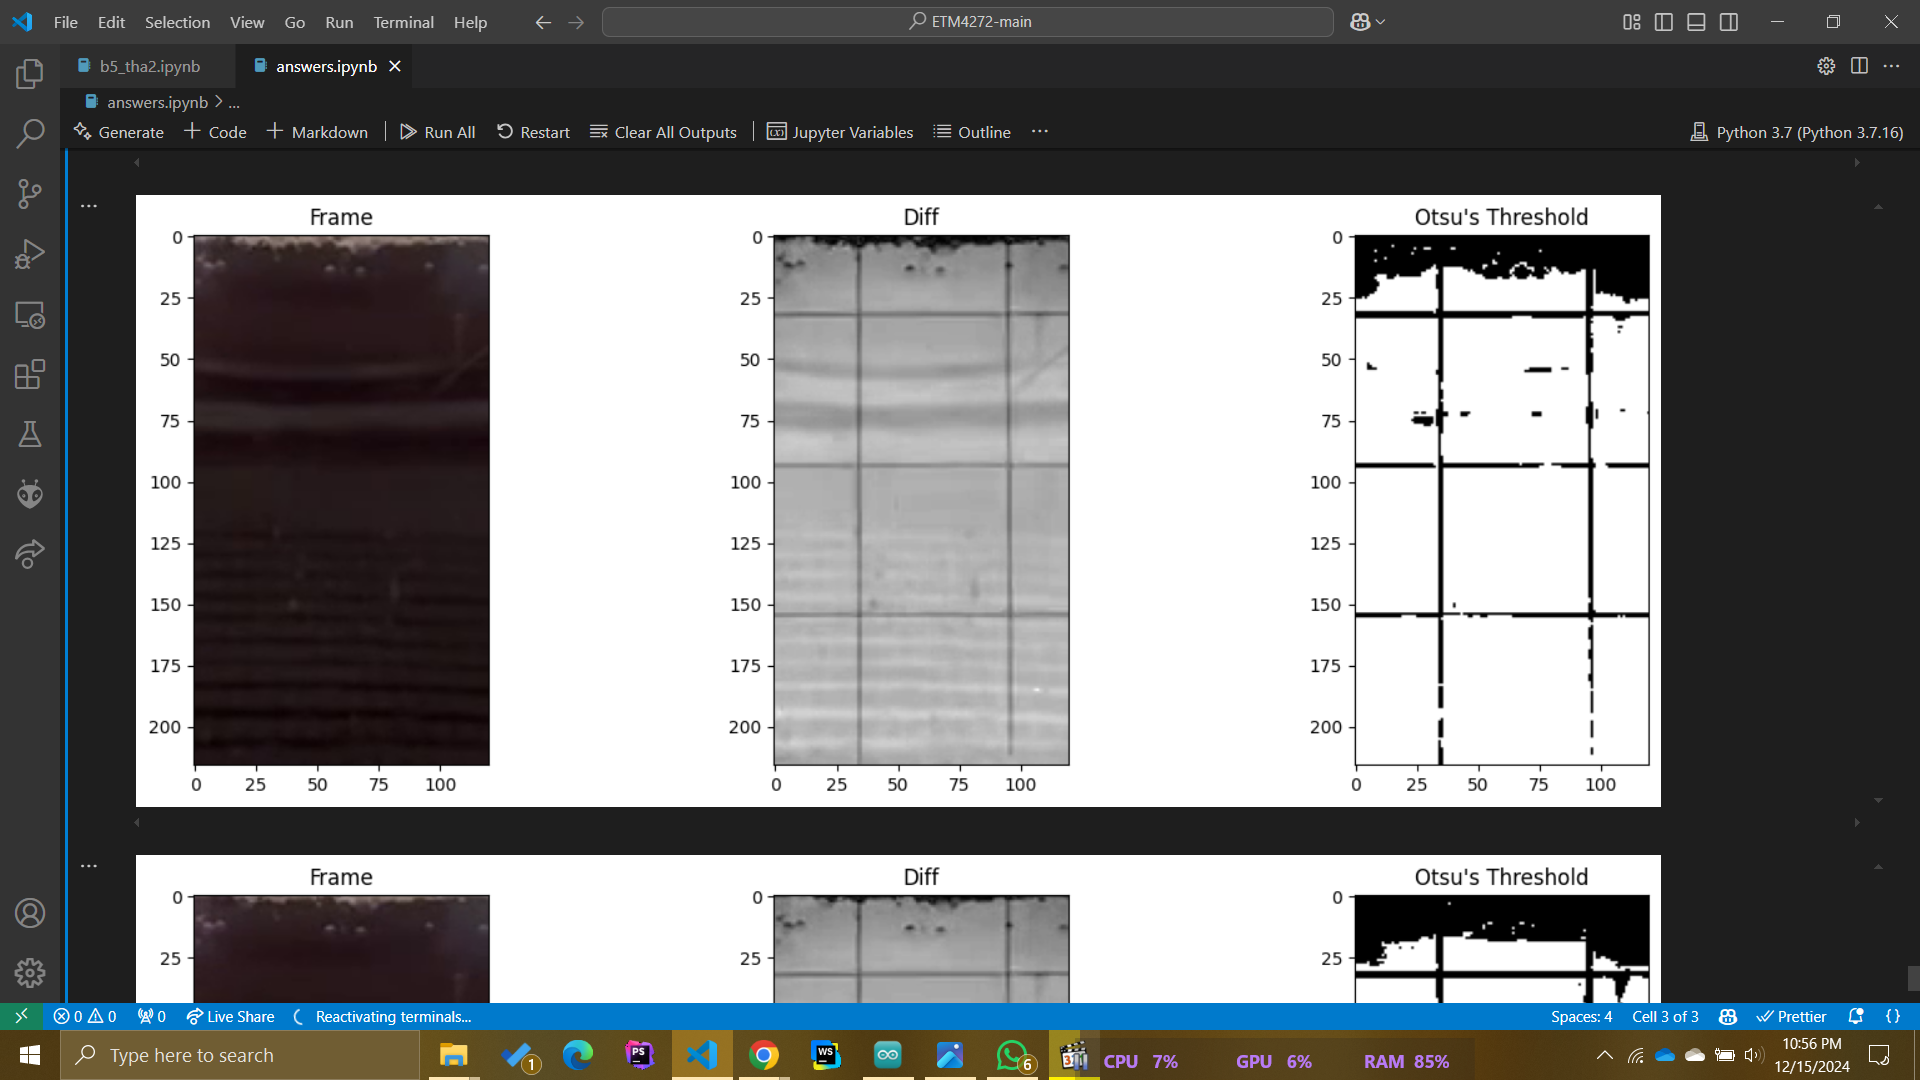

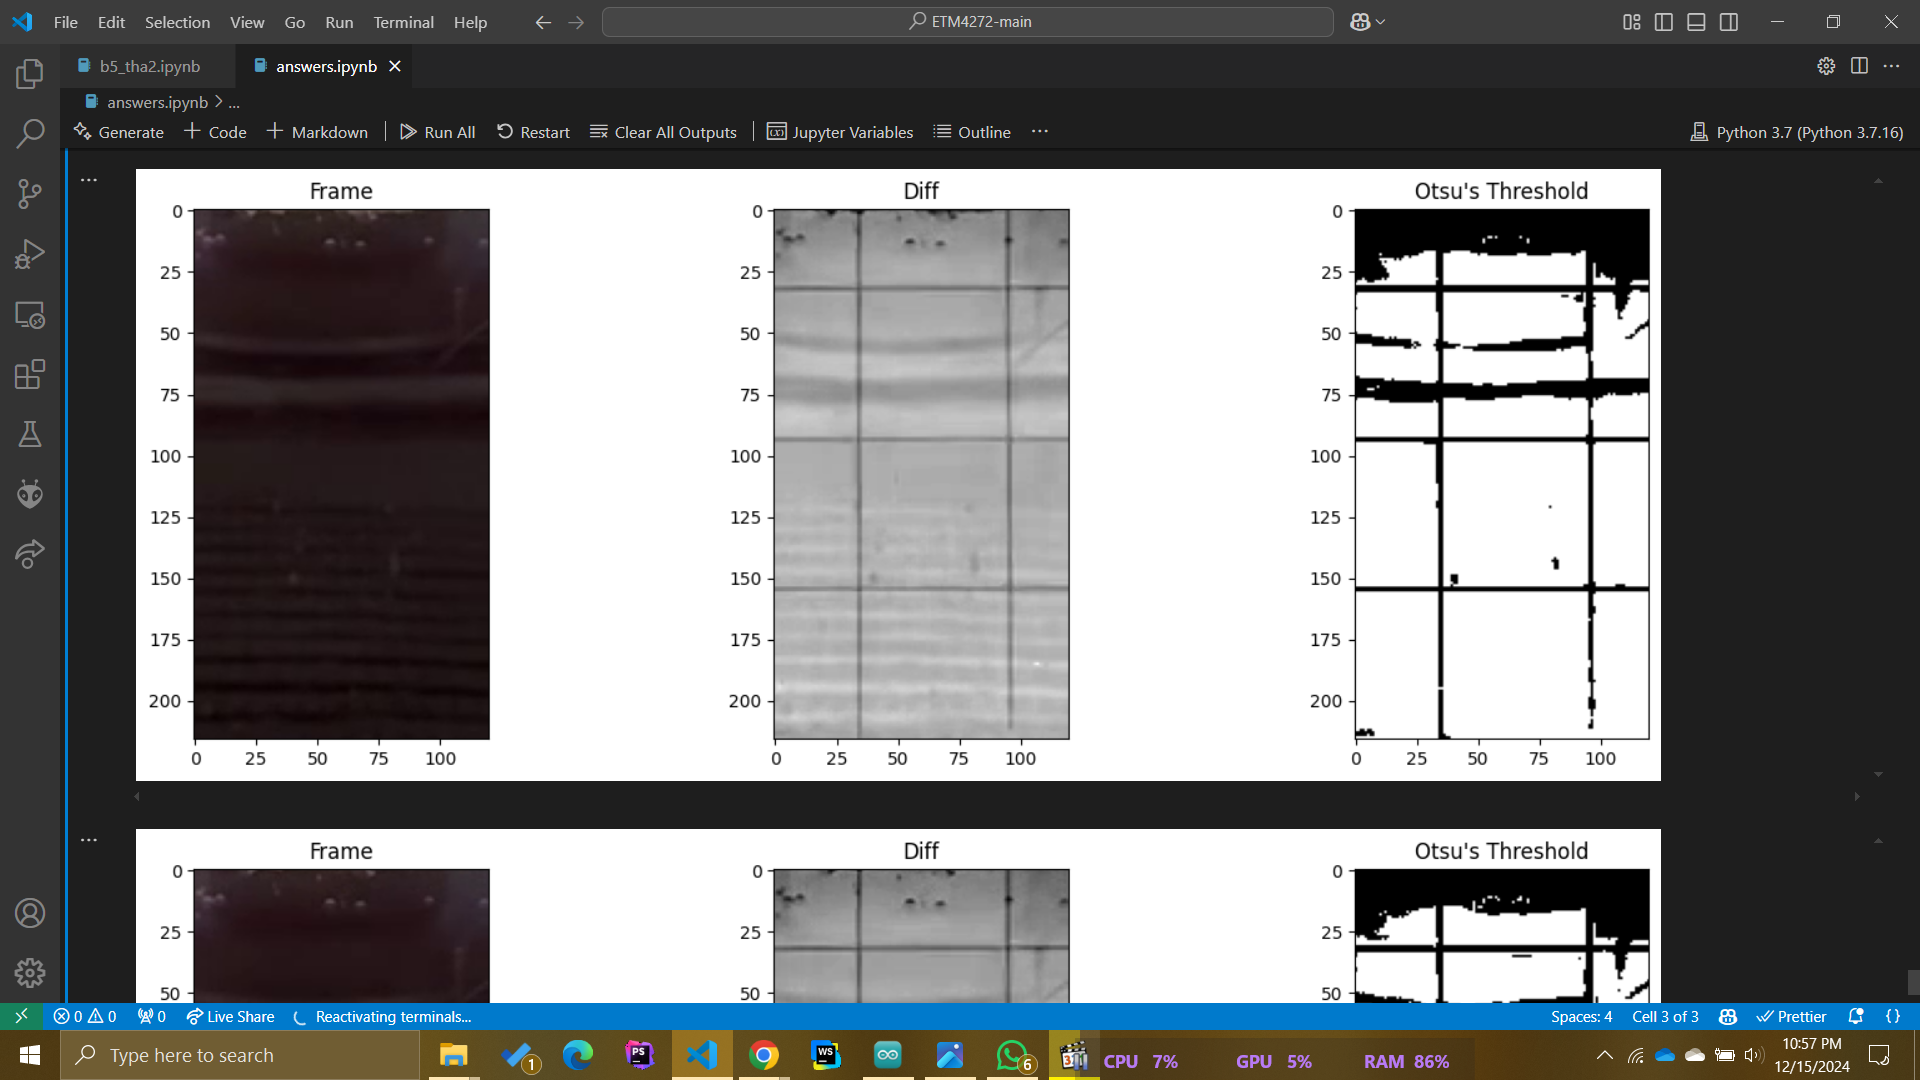

***A brief description on the final algorithm developed by the student.***

This Python code processes a video using OpenCV and Matplotlib to detect and analyze moving objects. The following steps outline its functionality:

*Video Capture:*

The video file is loaded, and the first frame is read and converted to grayscale.

*Frame Processing Loop:*

For each subsequent frame:The frame is converted to grayscale.
Background subtraction is performed by calculating the difference between the current frame and the first frame.
Otsu’s thresholding is applied to segment the moving objects.
Contours are detected, and the largest contour’s area is computed.
Contour Area Calculation: The percentage of the largest contour area relative to the full frame area is calculated and stored.

*Visualization:*

The original frame, difference image, and thresholded image are displayed in subplots using Matplotlib.

*Plotting Results:*

After processing all frames, a graph is plotted showing the percentage of the largest contour area versus frame number.

*Exit Option:*

The loop can be terminated early by pressing the 'q' key.